In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# importing Datasets

In [132]:
URL="dataset/Information.csv"
data_initial =pd.read_csv(URL,encoding='ISO-8859-1')
data_initial.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [133]:
data_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [134]:
data_initial.description.head()

0                                i sing my own rhythm.
1    I'm the author of novels filled with family dr...
2                  louis whining and squealing and all
3    Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4    Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
Name: description, dtype: object

In [135]:
len(data_initial.link_color.unique())

3001

In [136]:
data_initial.text.head()

0    Robbie E Responds To Critics After Win Against...
1    ÛÏIt felt like they were my friends and I was...
2    i absolutely adore when louis starts the songs...
3    Hi @JordanSpieth - Looking at the url - do you...
4    Watching Neighbours on Sky+ catching up with t...
Name: text, dtype: object

# Data Cleaning

In [137]:
data=pd.read_csv(URL,encoding='ISO-8859-1',
                 usecols=["gender","gender:confidence","profile_yn","profile_yn:confidence","description","text"],
                na_values=["not_available","NA",'nan','na','unavailable','unknown',-1])
data.head()

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text
0,male,1.0000,yes,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...
1,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...
2,male,0.6625,yes,1.0,louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...
4,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...


In [138]:
data.describe()

,gender:confidence,profile_yn:confidence
count,20024.000000,20050.000000
mean,0.882756,0.993221
std,0.191403,0.047168
min,0.000000,0.627200
25%,0.677800,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [139]:
data["gender"].unique()

array(['male', 'female', 'brand', nan], dtype=object)

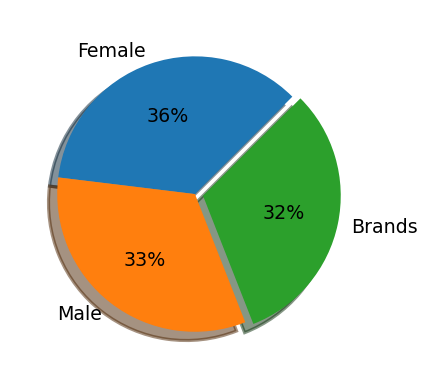

In [140]:
#pie chart visualisation of category of Users
users=data.gender.value_counts()
male_users_1=users["male"]
female_users_1=users["female"]
brand_1=users["brand"]

gender=["Female","Male","Brands"]
size=[female_users_1,male_users_1,brand_1]

plt.figure(figsize=(2,2),dpi=228)

plt.pie(size,labels=gender,explode=[0,0,0.06],textprops={'fontsize':6},startangle=45,autopct='%1.0f%%',shadow=True)

plt.show()

In [141]:
users

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

In [142]:
data[data["gender"] == "brand"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5942 entries, 6 to 20042
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 5942 non-null   object 
 1   gender:confidence      5942 non-null   float64
 2   profile_yn             5942 non-null   object 
 3   profile_yn:confidence  5942 non-null   float64
 4   description            4328 non-null   object 
 5   text                   5942 non-null   object 
dtypes: float64(2), object(4)
memory usage: 325.0+ KB


In [143]:
data=data[data.gender != "brand"]
data

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text
0,male,1.0000,yes,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...
1,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...
2,male,0.6625,yes,1.0,louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...
4,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...
...,...,...,...,...,...,...
20045,female,1.0000,yes,1.0,(rp),"@lookupondeath ...Fine, and I'll drink tea too..."
20046,male,1.0000,yes,1.0,"Whatever you like, it's not a problem at all. ...",Greg Hardy you a good player and all but don't...
20047,male,1.0000,yes,1.0,#TeamBarcelona ..You look lost so you should f...,You can miss people and still never want to se...
20048,female,0.8489,yes,1.0,Anti-statist; I homeschool my kids. Aspiring t...,@bitemyapp i had noticed your tendency to pee ...


In [144]:
#don't touch this cell
print(data.shape)
data.dropna(inplace=True)

(14108, 6)


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11194 entries, 0 to 20049
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 11194 non-null  object 
 1   gender:confidence      11194 non-null  float64
 2   profile_yn             11194 non-null  object 
 3   profile_yn:confidence  11194 non-null  float64
 4   description            11194 non-null  object 
 5   text                   11194 non-null  object 
dtypes: float64(2), object(4)
memory usage: 612.2+ KB


# Data Validation

In [146]:
data.isnull().any()

gender                   False
gender:confidence        False
profile_yn               False
profile_yn:confidence    False
description              False
text                     False
dtype: bool

In [147]:
data.isna().any()

gender                   False
gender:confidence        False
profile_yn               False
profile_yn:confidence    False
description              False
text                     False
dtype: bool

In [148]:
data[data["gender:confidence"]==0]

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text


In [149]:
data[data["description"].str.len() == 0]

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text


In [150]:
data[data["text"].str.len() == 0]

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text


# Data Preprocessing

#### Label Encoding :  <br><br>["male" ,"yes"] -> 1 and<br><br> ["Female","no"] -> 0

In [151]:
data.gender.replace({"male":1,"female":0},inplace=True)
data.profile_yn.replace({"yes":1,"no":0},inplace=True)

In [152]:
data.head()

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text
0,1,1.0000,1,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...
1,1,1.0000,1,1.0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...
2,1,0.6625,1,1.0,louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,1,1.0000,1,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...
4,0,1.0000,1,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...


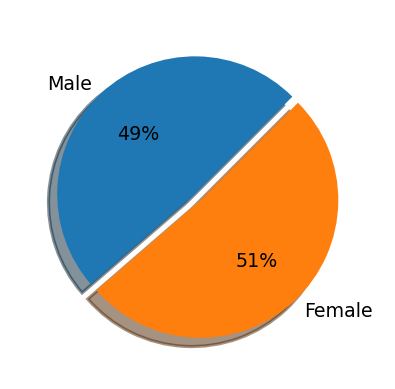

In [153]:
#pie chart visualisation of male users and female users
users=data.gender.value_counts()
male_users=users[1]
female_users=users[0]

gender=["Male","Female"]
size=[male_users,female_users]

plt.figure(figsize=(2,2),dpi=228)

plt.pie(size,labels=gender,explode=[0,0.06],textprops={'fontsize':6},startangle=45,autopct='%1.0f%%',shadow=True)

plt.show()

In [154]:
#pt=sns.FacetGrid(data,col='profile_yn:confidence')
#pt.map(plt.hist, 'gender', bins=20)
#plt.show()

In [155]:
ind=pd.Series(range(data.shape[0]))
data.set_index(ind,inplace=True)
data
#data.tail()

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text
0,1,1.0000,1,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...
1,1,1.0000,1,1.0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...
2,1,0.6625,1,1.0,louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,1,1.0000,1,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...
4,0,1.0000,1,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...
...,...,...,...,...,...,...
11189,0,1.0000,1,1.0,(rp),"@lookupondeath ...Fine, and I'll drink tea too..."
11190,1,1.0000,1,1.0,"Whatever you like, it's not a problem at all. ...",Greg Hardy you a good player and all but don't...
11191,1,1.0000,1,1.0,#TeamBarcelona ..You look lost so you should f...,You can miss people and still never want to se...
11192,0,0.8489,1,1.0,Anti-statist; I homeschool my kids. Aspiring t...,@bitemyapp i had noticed your tendency to pee ...


### Natural Language Processing

In [156]:
from sklearn.preprocessing import normalize
#download punkt and wordnet if its your First time :) else ignore
#nltk.download('punkt')
#nltk.download('wordnet')

In [157]:
# you cal also download from nltk.download('stopwords') then stop_words=set(stopwords.words('english'))
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [158]:
#important functions for removing unusual words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re

In [159]:
#initilize
lammitizer=WordNetLemmatizer()
stemmer=PorterStemmer()

In [160]:
#working
sentance="Hola ! We are Venom and we are here to protect you (Scrcasm) Hope you will enjoy with us. BTW We are Kidding"
sentance=re.sub(r'[!,.@#$%&<>?:;()]',"",sentance)
words=word_tokenize(sentance)
words

['Hola',
 'We',
 'are',
 'Venom',
 'and',
 'we',
 'are',
 'here',
 'to',
 'protect',
 'you',
 'Scrcasm',
 'Hope',
 'you',
 'will',
 'enjoy',
 'with',
 'us',
 'BTW',
 'We',
 'are',
 'Kidding']

In [161]:
#removing Stopwords
filtered_words =[word for word in words if not word in stopwords]
filtered_words

['Hola',
 'We',
 'Venom',
 'protect',
 'Scrcasm',
 'Hope',
 'will',
 'enjoy',
 'us',
 'BTW',
 'We',
 'Kidding']

In [162]:
#removing punctuations 
final_words=[stemmer.stem(word) for word in filtered_words]
final_words

['hola',
 'We',
 'venom',
 'protect',
 'scrcasm',
 'hope',
 'will',
 'enjoy',
 'us',
 'btw',
 'We',
 'kid']

In [163]:
def cleaning2(message):
    message = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                     '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', message)
    message = re.sub("(@[A-Za-z0-9_]+)","", message)
    words=message.split()
    filtered_words =[stemmer.stem(word.lower()) for word in words if not word.lower() in stopwords]
    return filtered_words


In [164]:
#final message
def cleaning(message):
    message = re.sub(r'([!,.@$%&<>?:;()+-/^0-9|]+)|(http\S+)|(#\S+)', '', message)
    message=re.sub(r'[#@]\S+',"",message)
    message=re.sub(r'\.',"",message)
    #words=word_tokenize(message)
    words=message.split()
    filtered_words =[stemmer.stem(word.lower()) for word in words if not word.lower() in stopwords]
    return filtered_words
#cleaning(sentance)

In [165]:
def flattern(Series):
    '''
    input : series/2d array
    output : list
    '''
    flat=[]
    for i in Series:
        for j in i:
            flat.append(j)
    return flat

In [166]:
#regex testing
temp=data.text[1]
cleaning(temp)

['\x89ûïit', 'felt', 'like', 'friend', 'live', 'stori', 'them\x89û\x9d']

In [167]:
# \x89ÛÏIt is not removing by the RE ....... Mercy and Help me :>(
data.text[1]

'\x89ÛÏIt felt like they were my friends and I was living the story with them\x89Û\x9d https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz'

In [168]:
#combining B
data["Combine"]=data.description+" "+data.text

In [169]:
full_data=data.Combine.apply(cleaning)


In [170]:
full_data.shape

(11194,)

In [171]:
#Step 1 : Create a Dictonary Of All Words
all_words= flattern(full_data)
len(all_words)

188573

In [172]:
#print(len(all_words))
unique_words = pd.Series(all_words).value_counts()
unique_words[2500:2600]

sketch      11
xbox        11
tryna       11
poll        11
toni        11
            ..
matt        10
matur       10
introduc    10
cooper      10
wet         10
Length: 100, dtype: int64

In [173]:
#after getting intuation from above lets reduce the vocab size to 2500
VOCAB_SIZE=2500

In [174]:
frequent_words = unique_words[:VOCAB_SIZE]

In [175]:
index=pd.Series(range(0,VOCAB_SIZE))
vocab_dict=pd.DataFrame({"word":frequent_words.index.values},index=index)
vocab_dict.index.name="word_id"
vocab_dict

,word
word_id,
0,love
1,just
2,like
3,not
4,get
...,...
2495,ï¤û¢
2496,beast
2497,tall


In [176]:
vocab_dict.iloc[1500]

word    streamer
Name: 1500, dtype: object

# Split  Test-train Data

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
full_data=pd.DataFrame.from_records(full_data)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(full_data, data.gender, test_size=0.30, random_state=42)

In [180]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
1922,sheher,probabl,watch,kitchen,nightmar,reallysulk,m,suspens,None,None,...,None,None,None,None,None,None,None,None,None,None
7359,û¢,zrc,everyth,see,zach,go,hug,never,let,go,...,None,None,None,None,None,None,None,None,None,None
9950,love,jesu,area,rep,fca,midcoast,southern,main,husband,denis,...,None,None,None,None,None,None,None,None,None,None
8008,madafuck,will,never,satisfi,lose,mind,freckl,face,lol,take,...,None,None,None,None,None,None,None,None,None,None
3948,¯¢¯¨¯±,¯_ô,¯©,ôöôà¯¬ôâôä,ôéôàô,¯ø¯_,ôé¯øô,ôä,¯¤ô,¯«¯¤¯á,...,None,None,None,None,None,None,None,None,None,None


In [181]:
y_train.head()

1922    0
7359    0
9950    1
8008    1
3948    1
Name: gender, dtype: int64

# Create A Sparse Matrix for Training Data

In [182]:
#we can also use dict / array but Index of Pandas is easy to Manage
word_index = pd.Index(vocab_dict.word)
type(word_index[3]) 

str

In [183]:
word_index.get_loc('fuck')

39

In [184]:
vocab_dict[vocab_dict.word=='fuck']

,word
word_id,
39,fuck


In [185]:
import sys

def making_Sparse(data,indexes,labels):
    '''
    Let Me tell You Something Gaurav:
    
    data : dataframe /Independent Variable/ containing all words i.e for this project X_test,X_train
    labels :Dependent Variable /Answers i.e for this project Y_test, Y_train
    indexes : Word Dict Indexes which contain words with index 
    '''
    exit=10
    tot_rows = data.shape[0]
    tot_cols = data.shape[1]
    temp_dict = []
    word_set = set(indexes)
    for row in range(tot_rows):
        for col in range(tot_cols):
            single_word = data.iat[row,col]
            
            if single_word in word_set:
                exit-=1
                doc_id = data.index[row]
                category = labels.at[doc_id]
                word_id = indexes.get_loc(single_word)
                item = {'LABEL': category, 'DOC_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                temp_dict.append(item)
                #print(temp_dict)
                
    final_sparse_matrics =pd.DataFrame(temp_dict)
    return final_sparse_matrics

In [186]:
%%time
sparse_train_df = making_Sparse(X_train, word_index, y_train)

CPU times: user 18.8 s, sys: 35 ms, total: 18.9 s
Wall time: 18.9 s


In [187]:
sparse_train_df.shape

(92771, 4)

In [188]:
X_train.iat[0,1] in word_index

True

In [189]:
X_train.index[0]

1922

In [190]:
y_train.at[X_train.index[0]]

0

In [191]:
word_index.get_loc('probabl')

228

In [192]:
X_train.iat[0,1]

'probabl'

In [193]:
sparse_train_df.tail()

,LABEL,DOC_ID,OCCURENCE,WORD_ID
92766,0,7270,1,115
92767,0,7270,1,6
92768,0,7270,1,90
92769,0,7270,1,974
92770,0,7270,1,3


In [194]:
train_grouped = sparse_train_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped.head()

OCCURENCE
DOC_ID WORD_ID LABEL           
1      2       1              1
       17      1              1
       50      1              1
       92      1              1
       167     1              1

In [195]:
train_grouped = train_grouped.reset_index()
train_grouped.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,1,2,1,1
1,1,17,1,1
2,1,50,1,1
3,1,92,1,1
4,1,167,1,1


In [196]:
%%time
# Create a Sparse matrix for Training Dataset

sparse_test_df = making_Sparse(X_test, word_index, y_test)

CPU times: user 8.77 s, sys: 0 ns, total: 8.77 s
Wall time: 8.77 s


In [197]:
test_grouped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum()
test_grouped = test_grouped.reset_index()
test_grouped.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,0,188,1,1
1,0,500,1,1
2,0,553,1,1
3,0,983,1,1
4,0,1631,1,1


In [198]:
train_grouped.head(3)

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,1,2,1,1
1,1,17,1,1
2,1,50,1,1


In [199]:
test_grouped.head(3)


,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,0,188,1,1
1,0,500,1,1
2,0,553,1,1


In [200]:
sparse_train_data=train_grouped.to_numpy()
sparse_train_data

array([[    1,     2,     1,     1],
       [    1,    17,     1,     1],
       [    1,    50,     1,     1],
       ...,
       [11191,   320,     1,     1],
       [11191,   367,     1,     1],
       [11191,   943,     1,     1]])

In [201]:
sparse_test_data=test_grouped.to_numpy()

# Hint
<b>at this point we have Sparse matrix of Both Test and Train Dataset</b><br>
 Now we need Full Sparse matrix containing Tweets words on Y-Axis (colm) and Common words on X-Axis (rows)<br>
i.e :
<br>
tweet 1: "We need to ban assault weapons and high-capacity magazines"<br>
clean tweet : need,ban,assault,weapons,high-capacity,magazines<br>
words in VOCAB (let) : need,ban,assault,weapons <br><br>
Full Sparse Matrix: [1(need),0,0,0,1(ban),0,0,0.....,1(assult),0,0,0,.....,1(weapon)......2500th 0]
<br><br>
in our dict these are words : ban ,weapon 

# Full Sparse Matrix

In [202]:
#step 1 : create a data Frame of nxm  where n=totaltweets and m= VOCAB_SIZE + GENDER + TWEET_ID(index)
columns= ["tweet_id","gender"]+list(range(VOCAB_SIZE))
columns[:10]

['tweet_id', 'gender', 0, 1, 2, 3, 4, 5, 6, 7]

In [203]:
index_names = np.unique(sparse_train_data[:, 0])
index_names

array([    1,     2,     4, ..., 11189, 11190, 11191])

In [204]:
%%time
full_sparse_train=pd.DataFrame(index=index_names,columns=columns)
full_sparse_train

CPU times: user 2.2 s, sys: 168 ms, total: 2.37 s
Wall time: 2.37 s


,tweet_id,gender,0,1,2,3,4,5,6,7,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
%%time
full_sparse_train.fillna(value=0,inplace=True)

CPU times: user 8.2 s, sys: 136 ms, total: 8.33 s
Wall time: 8.26 s


In [206]:
full_sparse_train.head(3)

,tweet_id,gender,0,1,2,3,4,5,6,7,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
sparse_train_data

array([[    1,     2,     1,     1],
       [    1,    17,     1,     1],
       [    1,    50,     1,     1],
       ...,
       [11191,   320,     1,     1],
       [11191,   367,     1,     1],
       [11191,   943,     1,     1]])

In [208]:
train_grouped.columns

Index(['DOC_ID', 'WORD_ID', 'LABEL', 'OCCURENCE'], dtype='object')

In [209]:
#set the Hyperparameters
DOC_ID = 0
WORD_ID = 1
LABEL = 2
OCCURANCE = 3

In [210]:
%%time
#filling the values of train Grouped in to Full Sparse Matrix

#the code shown below is Clear Statement  : "You would'nt Understand" -JoKer 
for i in range(sparse_train_data.shape[0]):
    #step 1 : Fetch the Data from Sparse_matrix that we have created earlier
    document_nr = sparse_train_data[i][DOC_ID]
    word_id = sparse_train_data[i][WORD_ID]
    gender = sparse_train_data[i][LABEL]
    freq_of_word = sparse_train_data[i][OCCURANCE]
    
    #step 2 : Place the above data into new Created full Sparse Matrix
    full_sparse_train.at[document_nr,'tweet_id'] = document_nr
    full_sparse_train.at[document_nr,'gender'] = gender
    full_sparse_train.at[document_nr,word_id] = freq_of_word


CPU times: user 5.28 s, sys: 7.91 ms, total: 5.28 s
Wall time: 5.28 s


In [211]:
full_sparse_train.head(5)

,tweet_id,gender,0,1,2,3,4,5,6,7,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,1,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
full_sparse_train.set_index('tweet_id', inplace=True)
full_sparse_train.head()

,gender,0,1,2,3,4,5,6,7,8,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
tweet_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
full_sparse_train.shape

(7826, 2501)

In [214]:
#do the above procedure for train dataset Too
# i'm just copying the above code 
# You can also create a function if You need Validation DATASET Too

In [215]:
index_names_test = np.unique(sparse_test_data[:, 0])
full_sparse_test=pd.DataFrame(index=index_names_test,columns=columns)
full_sparse_test.fillna(value=0,inplace=True)
full_sparse_test.head(3)

,tweet_id,gender,0,1,2,3,4,5,6,7,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
%%time
#filling the values of test Grouped in to Full Sparse Matrix
#hyper parameters are same for train and test
for i in range(sparse_test_data.shape[0]):
    #step 1 : Fetch the Data from Sparse_matrix that we have created earlier
    document_nr = sparse_test_data[i][DOC_ID]
    word_id = sparse_test_data[i][WORD_ID]
    gender = sparse_test_data[i][LABEL]
    freq_of_word = sparse_test_data[i][OCCURANCE]
    
    #step 2 : Place the above data into new Created full Sparse Matrix
    full_sparse_test.at[document_nr,'tweet_id'] = document_nr
    full_sparse_test.at[document_nr,'gender'] = gender
    full_sparse_test.at[document_nr,word_id] = freq_of_word


CPU times: user 2.31 s, sys: 11.9 ms, total: 2.32 s
Wall time: 2.31 s


In [217]:
full_sparse_test.head(5)

,tweet_id,gender,0,1,2,3,4,5,6,7,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,10,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,12,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Naive Bayes Model

In [218]:
#total tweets
full_sparse_train.index.size

7826

In [219]:
#tweets by Males
full_sparse_train.gender.sum()

3824

In [220]:
prob_male_tweets = full_sparse_train.gender.sum() / full_sparse_train.index.size  
prob_male_tweets

0.4886276514183491

In [221]:
prob_female_tweets = 1-prob_male_tweets
prob_female_tweets

0.5113723485816509

In [222]:
#we need only words in a matrix
full_train_features=full_sparse_train.drop(['gender'],axis=1)
full_train_features.head(3)

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
tweet_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
#we need how many words remaining in tweet af filtering all things
tweet_length_train=full_train_features.sum(axis=1)
tweet_length_train[:5]

tweet_id
1    11
2    10
4    16
5     9
6    13
dtype: int64

In [224]:
total_words_count_train = tweet_length_train.sum()
total_words_count_train

92771

In [225]:
male_tweet_length_train = tweet_length_train[full_sparse_train.gender == 1]
male_tweet_length_train

tweet_id
1        11
2        10
6        13
16        7
21       10
         ..
11178     9
11184    14
11186    10
11190    12
11191    14
Length: 3824, dtype: int64

In [226]:
male_tweet_wc_train = male_tweet_length_train.sum()
male_tweet_wc_train

46681

In [227]:
female_tweet_wc_train = total_words_count_train - male_tweet_wc_train
female_tweet_wc_train

46090

In [228]:
# cross check female_tweet_wc_train
tweet_length_train[full_sparse_train.gender == 0].sum()

46090

In [229]:
words_train_tweet_male = full_train_features[full_sparse_train.gender==1].sum(axis=0) 
# to avoid Zero Devision Error in finding Probability as too many columns are zero
words_train_tweet_male +=1
words_train_tweet_male.tail()

2495    3
2496    8
2497    6
2498    8
2499    5
dtype: int64

In [230]:
words_train_tweet_female = full_train_features[full_sparse_train.gender==0].sum(axis=0)
# to avoid Zero Devision Error in finding Probability as too many columns are zero

words_train_tweet_female +=1

words_train_tweet_female.tail()

2495    7
2496    3
2497    4
2498    3
2499    7
dtype: int64

In [231]:
#Fun Facts
print(f"Average Nr of Words in Male Tweets   {male_tweet_wc_train/full_sparse_train.gender.sum()}")

print(f"Average Nr of Words in female Tweets   {female_tweet_wc_train/(full_sparse_train.index.size-full_sparse_train.gender.sum())}")

Average Nr of Words in Male Tweets   12.207374476987448
Average Nr of Words in female Tweets   11.516741629185407


In [232]:
# P(Word | Male) - Probability that a Word Occurs given that it's tweeted by Male
prob_token_male = words_train_tweet_male / (male_tweet_wc_train + VOCAB_SIZE)
prob_token_male

0       0.009313
1       0.008601
2       0.007544
3       0.008113
4       0.007218
          ...   
2495    0.000061
2496    0.000163
2497    0.000122
2498    0.000163
2499    0.000102
Length: 2500, dtype: float64

In [233]:
# P(Word | female) - Probability that a Word Occurs given that it's tweeted by female

In [234]:
prob_token_female = words_train_tweet_female / (female_tweet_wc_train + VOCAB_SIZE)
prob_token_female

0       0.012739
1       0.010537
2       0.009323
3       0.008191
4       0.007121
          ...   
2495    0.000144
2496    0.000062
2497    0.000082
2498    0.000062
2499    0.000144
Length: 2500, dtype: float64

In [235]:
#P(Token) - Probability that Token Occurs (tweeted either by Male or Female)
prob_token_occur = full_train_features.sum(axis=0) / total_words_count_train

prob_token_occur.sum() #means our model is correct

0.9999999999999999

In [236]:
prob_token_occur

0       0.011588
1       0.010057
2       0.008861
3       0.008569
4       0.007535
          ...   
2495    0.000086
2496    0.000097
2497    0.000086
2498    0.000097
2499    0.000108
Length: 2500, dtype: float64

# Prepare Test Data

In [237]:
y_test = full_sparse_test[gender]
X_test = full_sparse_test.drop(['gender'],axis=1)

###### Vault

In [238]:
prob_female_tweets,prob_male_tweets

(0.5113723485816509, 0.4886276514183491)

In [239]:
prob_token_female.head(3)

0    0.012739
1    0.010537
2    0.009323
dtype: float64

In [240]:
prob_token_male.head(3)

0    0.009313
1    0.008601
2    0.007544
dtype: float64

In [241]:
prob_token_occur.head(3)

0    0.011588
1    0.010057
2    0.008861
dtype: float64

In [242]:
X_test.head()

,tweet_id,0,1,2,3,4,5,6,7,8,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,10,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [243]:
#as X_test have 2501 columns and we do not need Tweet id
try:
    X_test.drop(['tweet_id'],axis=1,inplace=True)
except:
    print("Already Dropped")

# We have to find <br>
$$P(Female \, | \, X) = \frac{P(X \, | \, Female) \, P(Female)} {P(X)}$$


# Here we will Try Log Probability 
#### as Number is so small but it is not Mandatory 

$$P(Female \, | \, X) = log(P(X \, | \, Female)) \,+ log(P(Female) - log({P(X)})$$

In [244]:
np.log(prob_token_female)

0      -4.363068
1      -4.552848
2      -4.675281
3      -4.804721
4      -4.944734
          ...   
2495   -8.845263
2496   -9.692561
2497   -9.404879
2498   -9.692561
2499   -8.845263
Length: 2500, dtype: float64

In [245]:
joint_log_female = X_test.dot(np.log(prob_token_female) - np.log(prob_token_occur)) + np.log(prob_female_tweets)

In [246]:
X_test.shape

(3356, 2500)

In [247]:
prob_token_male.shape

(2500,)

In [248]:
prob_token_occur.shape

(2500,)

In [249]:
prob_token_female.shape

(2500,)

In [250]:
joint_log_female.head(3)

0   -1.249969
3   -5.245083
8   -2.137516
dtype: float64

In [251]:
joint_log_male = X_test.dot(np.log(prob_token_male) - np.log(prob_token_occur)) + np.log(prob_male_tweets)

In [252]:
#np.log(np.exp(joint_log_female.head()))
#some probability are more than one bcz we added one in all occurances previously
np.exp(joint_log_female).tail()

11182    1.680782
11187    0.241249
11188    0.865189
11192    0.333347
11193    0.245682
dtype: float64

# Predictions

###### So output is quite easy to predict. <br>if Probability of a tweet to be written by Female is More than Male then It is Definetly Written By Her and vice versa is also true

In [253]:
y_test

0        0
3        0
8        1
10       0
12       0
        ..
11182    1
11187    1
11188    1
11192    0
11193    0
Name: 0, Length: 3356, dtype: int64

In [254]:
temps=joint_log_male>joint_log_female

In [255]:
(temps*1 == y_test).sum()

1685

In [256]:
y_test.count()

3356

In [257]:
1688/3355

0.5031296572280178

# Model 2

In [271]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [261]:
data.Combine

0        i sing my own rhythm. Robbie E Responds To Cri...
1        I'm the author of novels filled with family dr...
2        louis whining and squealing and all i absolute...
3        Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4        Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
                               ...                        
11189    (rp) @lookupondeath ...Fine, and I'll drink te...
11190    Whatever you like, it's not a problem at all. ...
11191    #TeamBarcelona ..You look lost so you should f...
11192    Anti-statist; I homeschool my kids. Aspiring t...
11193    Teamwork makes the dream work. I think for my ...
Name: Combine, Length: 11194, dtype: object

In [264]:
def preprocessing(message):
    message = re.sub(r'([!,.@$%&<>?:;()+-/^0-9|]+)|(http\S+)|(#\S+)', '', message)
    message=re.sub(r'[#@]\S+',"",message)
    message=re.sub(r'\.',"",message)
    #words=word_tokenize(message)
    words=message.split()
    filtered_words =[stemmer.stem(word.lower()) for word in words if not word.lower() in stopwords]
    return " ".join(filtered_words)

In [265]:
# 1- The goal of MIN_DF is to ignore words that have very few occurrences to be considered meaningful
# 2- MAX_DF is to ignore words that are too common (0.0 - 1.0)
# 3- The default tokenization in CountVectorizer removes all special characters, 
#    punctuation and single characters. If this is not the behavior you desire, 
#    and you want to keep punctuation and special characters, 
#    you can provide a custom tokenizer to CountVectorizer
# 4- Custom Preprocessing preprocessor=cleaning
# 5 -Working With N-Grams
vector = CountVectorizer(stop_words=stopwords,preprocessor=preprocessing)
#vector.get_stop_words()
vector.build_analyzer()

functools.partial(<function _analyze at 0x7fc6238094d0>, ngrams=<bound method _VectorizerMixin._word_ngrams of CountVectorizer(preprocessor=<function preprocessing at 0x7fc6068a8a70>,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at',
                            'be', 'because', 'been', 'before', 'being', 'below',
                            'between', 'both', 'but', 'by', 'could', 'did',
                            'do', 'does', 'doing', 'down', ...])>, tokenizer=<built-in method findall of re.Pattern object at 0x7fc606660d30>, preprocessor=<function preprocessing at 0x7fc6068a8a70>, decoder=<bound method _VectorizerMixin.decode of CountVectorizer(preprocessor=<function preprocessing at 0x7fc6068a8a70>,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at',
                 

In [266]:
%%time
data_cleaned = vector.fit_transform(data.Combine)

CPU times: user 7.75 s, sys: 0 ns, total: 7.75 s
Wall time: 7.75 s


In [270]:
#vector.get_feature_names()
#print(vector.vocabulary_)

In [272]:
X_train, X_test, y_train, y_test = train_test_split(data_cleaned, data.gender, 
                                                   test_size=0.3, random_state=88)

In [275]:
classifier = MultinomialNB()

In [276]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [277]:
nr_correct = (y_test == classifier.predict(X_test)).sum()
print(f'{nr_correct} documents classfied correctly')

2259 documents classfied correctly


In [278]:
nr_incorrect = y_test.size - nr_correct
print(f'Number of documents incorrectly classified is {nr_incorrect}')

Number of documents incorrectly classified is 1100


In [279]:
fraction_wrong = nr_incorrect / (nr_correct + nr_incorrect)
print(f'The (testing) accuracy of the model is {1-fraction_wrong:.2%}')

The (testing) accuracy of the model is 67.25%


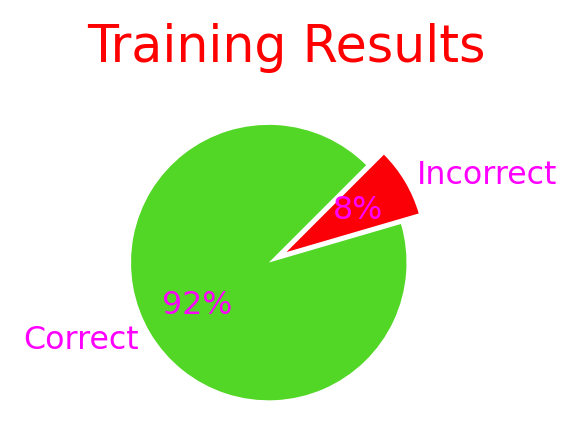

In [297]:
#pie chart visualisation of Results of Training data
nr_correct_train = (y_train == classifier.predict(X_train)).sum()
nr_incorrect_train = y_train.size - nr_correct_train
size=[nr_correct_train,nr_incorrect_train]
plt.figure(figsize=(2,2),dpi=228)
offset = [0.15, 0.00]
plt.pie(size,labels=["Correct","Incorrect"],textprops={'fontsize':10,'color':'magenta'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["#52D726","#FB0007"])
plt.title("Training Results",fontdict={"size":16,"color":'red'})
plt.show()

In [283]:
classifier.score(X_test, y_test)*100

67.25215838047038

In [284]:
classifier.score(X_train, y_train)*100

92.02297383535418

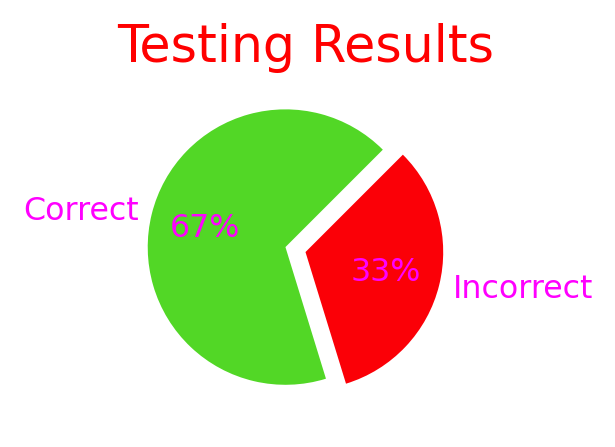

In [299]:
#pie chart visualisation of Results of Testing data
size=[nr_correct,nr_incorrect]
plt.figure(figsize=(2,2),dpi=228)
offset = [0.15, 0.00]
plt.pie(size,labels=["Correct","Incorrect"],textprops={'fontsize':10,'color':'magenta'},startangle=45,autopct='%1.00f%%', explode=offset,colors=["#52D726","#FB0007"])
plt.title("Testing Results",fontdict={"size":16,"color":'red'})
plt.show()

<code>
     Inference:
        
                Training Accuracy is Quite Healthy because There is Lot of Overfitting in 
                The Model
                Reason : There are aproximate all words are common in Tweets of Male 
                         and Female and By this Model is Unable to 
                         distinguish between Male Tweet and female tweets
                         
                That's Why Testing Accu
                
</code>

In [288]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [289]:
recall_score(y_test, classifier.predict(X_test))

0.5929887106357694

In [290]:
precision_score(y_test, classifier.predict(X_test))

0.7062986553432413

In [291]:
f1_score(y_test, classifier.predict(X_test))

0.6447028423772609